# Logist Regression(Application)

**Gradient Descent algorithm:**

输入:样本数据$T=\{(x_1,y_1),(x_2,y_2),...,(x_N,y_N)\},y_i\in\{0,1\}$,梯度步长$\alpha$,迭代停止阈值$\epsilon$

输出:样本预测labels.

(1) 初始化参数$W,b$,两者都是向量形式,一般定义为一个很小的数字.

(2) 计算线性值:$Z=W\cdot X+b$

(3) sigma函数作用:$A=sigmoid(Z)$

(4) 计算损失函数:$loss(w,b) = -\frac{1}{N}\cdot \sum_{i=1}^{N}[y_ilog(\hat{y_i})+(1-y_i)log(1-\hat{y})]$

(4.1) 计算$dW,db$:$dW=\frac{1}{m}\cdot X(A-Y),db=\frac{1}{m}\cdot \sum{(A-Y)}$

(5) 更新参数值:$W=W - \alpha \cdot dW,b=b-\alpha \cdot db$

(5.1) L1:$W=W - \alpha \cdot (dW+\lambda sign(W)),b=b-\alpha \cdot db$

(5.2) L2:$W=W - \alpha \cdot (dW+\lambda W),b=b-\alpha \cdot db$

(6) 重复(2)-(5)直到损失函数在阈值$\epsilon$内.退出迭代

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import h5py

### 1 Load data set

这里的数据集使用iris数据集.

In [2]:
def loadData_iris():
    """
    Returns:
    --------
        X:have two dimensions (sepal length and width).
        Y:labels.
    """
    iris = datasets.load_iris()
    X = iris.data[:100, :2] 
    Y = iris.target[:100]
    return X,Y

In [3]:
X,Y = loadData_iris()

#### 1.1 绘制原图查看

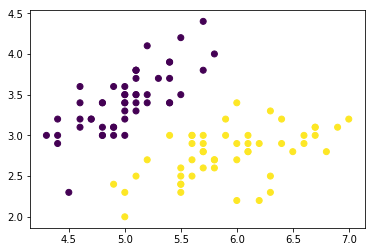

In [4]:
plt.scatter(X[:,0],X[:,1],c=Y)

#### 1.2 Split data set

我们将数据集划分为训练样本和测试样本,比例为:

训练样本:测试样本 = 0.8:0.2

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### 2 Build Logistic Regression Model

在构建模型之前,我们需要注意,用Python实现算法的过程中,一定要避免多次for-loop,因为Python的效率比较低,多次使用for-loop会使得代码执行效率非常低下.所以要养成在实现算法的时候避免多次for-loop.所以我们能使用向量的形式就不要使用for-loop或者while-loop.

#### 2.1 Sigmoid function

$\sigma(z)=\frac{1}{1+e^{-z}}$

In [6]:
def sigmoid(Z):
    return 1./(1. + np.exp(-Z))

#### 2.2 initialization parameters

这里在初始化参数时需要有几个注意的地方:

(1) 参数$w,b$的初始值不可过大,这样会使得参数初始值处于sigmoid函数的平缓地带.所以我们会使用

```python
W = np.random.rand(1,n)```

(2) 我们需要设置随机种子,这样可以保证每次运行的初始结果是一样的.这样做的好处是:

我们在进行不同超级参数$\alpha,\lambda,Iter$调节的时候,不会因为初始值的改变而使得结果不可信.

In [7]:
def initial(n):
    """
    initialization parameters
    
    Returns:
    -------
        W:weights
        b:bias
    """
    np.random.seed(1)
    W = np.random.rand(1,n)
    b = np.zeros((1,1))
    
    return W,b

#### 2.3 Build LR

构建基本的Logistics Regression的时候,我们需要看看各个参数的维度以及损失函数

**参数维度:**

假设我们的训练样本$X$的维度是(m,n),标签的维度是(1,m)其中m:样本数量,n:特征数量

那么我们经过参数$W,b$预测出来的值记为$A$则:

$A$:(1,m)

$Z$:(1,m),因为$sigmoid(Z)$并不改变矩阵维度

$Z=WX+b$:所以我们令$W$的维度为(1,n),这样$(1,n)X(m,n)^{T} $可以得到(1,m).$b$为常数.


**Ps:**


- 其实这里的初始$W,b$维度可以不用这样令.无论是$W$转置还是$X$只要最后能得到(1,m)的形式就行,我这里这样令维度是对接神经网络,方便记忆.

- 特别地:在python中形状是(m,)就相当于维度(1,m)

- 因为Numpy的广播机制存在,所以$WX$得到的结果可以和一个常数相加


In [8]:
def LR(X_train,y_train,alpha,Iter,is_print=False):
    
    """
    Implementation Logistics Regression.
    
    Parameters:
    ----------
        X_train: training set
        y_train: labels
        alpha: learning rate
        Iter: Iter
        is_print: is print loss value.
        
    Return:
        W: Best weights
        b: Best bias
        cost: loss value.
    
    
    """
    m,n = X_train.shape
    
    W,b = initial(n)
    cost = []
    for iter_ in range(Iter):

        Z = np.dot(W,X_train.T) + b
        A = sigmoid(Z)
        
        loss = - np.sum((y_train*np.log(A)+(1-y_train)*np.log(1-A)))/m
        cost.append(loss)
        
        if is_print and iter_ % 10==0:
            print("Iter:{},loss:{}".format(iter_,loss))
            
        dZ = A - y_train
        
        dW = np.dot(dZ,X_train)/m
        
        assert dW.shape == W.shape  # Make sure the shape is rigth.
        
        db = np.sum(dZ,keepdims=True) /m
        
        assert db.shape == b.shape 
        
        # Update parameters.
        
        W = W - alpha * dW
        b = b - alpha * db
        
    return W,b,cost

In [9]:
W,b,cost = LR(X_train,y_train,0.1,100,is_print=True)

Iter:0,loss:2.161388059335653
Iter:10,loss:0.7265183340216593
Iter:20,loss:0.6620905229934377
Iter:30,loss:0.6069928037970909
Iter:40,loss:0.5597795478119861
Iter:50,loss:0.519167524821553
Iter:60,loss:0.48405830518414694
Iter:70,loss:0.4535332296778389
Iter:80,loss:0.4268345248252592
Iter:90,loss:0.4033415847378393


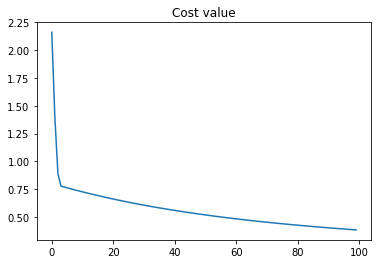

In [10]:
plt.plot(cost);plt.title('Cost value');

可以看出在迭代过程中损失是在下降的,这是符合正常逻辑的.一般如果参数设置的比较好,你会发先你的损失函数图会呈现类似于上图的情况


#### 2.4 Build Predict function

现在构建预测函数,并且返回正确率.

另外我们说过,在sigmoid函数中如果值大于0.5,我们将其分为第一类,小于0.5我们可以将其分为第二类.

所以我们可以使用四舍五入函数

```python

np.round(A)```

In [11]:
def Predict(X_test,y_test,W,b):
    """
    Predict labels.
    
    Prameters:
    ----------
        X_test:testing set
        y_test:labels
        W:weights
        b:bias
        
    Return:
    ------
        correct_rate: correct rate.
    
    """
    Z = np.dot(W,X_test.T) + b
    A = sigmoid(Z)
    
    predict_y = np.round(A) 
    
    correct_rate = np.sum((predict_y==y_test))/y_test.shape[0]
    
    return correct_rate

In [12]:
correct_rate = Predict(X_test,y_test,W,b)
print('The test set correct rate is:',correct_rate)

The test set correct rate is: 1.0


In [13]:
correct_rate = Predict(X_train,y_train,W,b)
print('The train set correct rate is:',correct_rate)

The train set correct rate is: 0.9875


可以看出无论是测试样本还是训练样本的正确率都可以接受.所以该模型现阶段是可行的.也没有发生过拟合或者欠拟合的现象.

**Ps:**

(1) 实际上在寻找最优参数$W,b$的过程中,我们是不知道该如何调节学习率和迭代次数来保证找到的参数是优秀的.

(2) 通常学习率不可以过高,学习率没有其他的办法去预测,只有靠经验来预估.

(3) 一个比较好的方法就是交叉验证,对于不同的学习率和迭代次数所参数的测试、训练样本正确率进行比对,选择较好的学习率和迭代次数.

### 3 Scikit-learn LogisticRegression

同样我们也可以使用scikit-learn中的LogisticRegression来拟合数据

**Ps:**

scikit-learn中对于LR有两个函数:

(1) [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression):即我们普通的LR

(2) [LogisticRegressionCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html):带交叉验证的LR



In [14]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

/Users/huwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
logreg_predict = logreg.predict(X_test)

In [16]:
accurate = (logreg_predict == y_test).sum() / y_test.shape[0]

print('the test set accurate is:',accurate)

the test set accurate is: 1.0


### 4 Regularization

如果你发现在拟合过程中,无论怎样调节超级参数$learning rate,Iter,C$都无法出现很好的情况,那么除了[特征工程](https://www.zhihu.com/question/29316149)之外,你就需要考虑正则化.

其中C是惩罚项,就是我们正则化式子中的$\lambda$


(1) $L_1$ Regular:$loss(W) = -[Ylog(\hat{Y})+(1-Y)log(1-\hat{Y})] + \lambda {||W||}_1$

(2) $L_1$ Regular:$loss(W) = -[Ylog(\hat{Y})+(1-Y)log(1-\hat{Y})] + \frac{\lambda}{2} {||W||}_2$

In [17]:
def LR_Regular(X_train,y_train,alpha,Iter,C,is_print,Regular_method='l2'):
    """
    Implementation Regularization of LR
    
    Prameters:
    ---------
        X_train: training set.
        y_train: labels
        alpha: learning
        Iter:number of iterative
        C: regularization strength
        is_print: is print loss value
        Regular_method: l1 or l2,default l2
    Return:
    ------
        W:Weights
        b:bias
        cost: loss value
    """
    m,n = X_train.shape
    W,b = initial(n)
    
    cost = []
    
    for iter_ in range(Iter):
        
        Z = np.dot(W,X_train.T) + b
        A = sigmoid(Z)
        
        if Regular_method =="l2":
            loss = - (np.sum((y_train*np.log(A)+(1-y_train)*np.log(1-A))) + (C/2)*np.sum(W**2))/m
        elif Regular_method=="l1":
            loss = - (np.sum((y_train*np.log(A)+(1-y_train)*np.log(1-A))) + C*np.sum(np.abs(W)))/m
        
        cost.append(loss)
        if is_print and iter_ % 100 ==0:
            print("Iter:{},loss:{}".format(iter_,loss))
            
        dZ = A - y_train
        if Regular_method =="l2": 
            dW = (np.dot(dZ,X_train)+C*W)/m
        elif Regular_method =="l1": 
            dW = (np.dot(dZ,X_train)+C*np.sign(W))/m
        
        assert dW.shape == W.shape # Make sure the shape is right.
        
        db = np.sum(dZ,keepdims=True) /m
        
        assert db.shape == b.shape
        
    
        W = W - alpha * dW
        b = b - alpha * db
        

    return W,b,cost

In [18]:
W,b,cost = LR_Regular(X_train,y_train,0.1,90,0.1,True,'l2')

Iter:0,loss:2.160955075130491


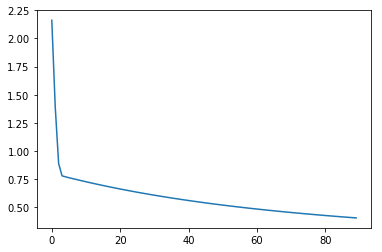

In [19]:
plt.plot(cost)

In [20]:
correct_rate = Predict(X_test,y_test,W,b)
print('The test set correct rate is:',correct_rate)

The test set correct rate is: 1.0


In [21]:
correct_rate = Predict(X_train,y_train,W,b)
print('The test set correct rate is:',correct_rate)

The test set correct rate is: 0.9875


实际上这里的例子并不会因为正则化之后而变得特别好,因为数据过于简单.所以正则化无法很好的体现,但是正则化会加快最优值的收敛.

#### 4.2 Scikit-laern

同样我们也可以在scikit上使用正则化

**Ps:**

在scikit中alpha是惩罚项,且惩罚项定义的是$\frac{1}{C}$,也就是说与我们定义的是为导数关系,所以scikit中C越小惩罚越大

```python
"""alpha : float
        Regularization parameter. alpha is equal to 1 / C."""```
        
附上其[源码](https://github.com/scikit-learn/scikit-learn/blob/7389dba/sklearn/linear_model/logistic.py#L998)

In [22]:
logreg = LogisticRegression(C=0.1)
logreg.fit(X_train,y_train)
logreg_predict = logreg.predict(X_test)
accurate = (logreg_predict == y_test).sum() / y_test.shape[0]
print('the test set accurate is:',accurate)

the test set accurate is: 1.0


/Users/huwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 5 LR and Picture

现在我们来看看最后一个案例,将LR应用于图片分类中.构建"猫与非猫"的二元分类器

#### 5.1 加载数据集

这个数据集是放在h5文件中的,所以我们需要使用库h5py将图片数据读取出来.

In [23]:
def load_data():
    '''
    create train set and test set
    make sure you have .h5 file in your dataset
    
    Returns:
    -------
        train_set_x_orig: original train set shape is (209, 64, 64, 3) 
        train_set_y_orig: original train label shape is (209,)
        test_set_x_orig: original test set shape is (50, 64, 64, 3)
        test_set_y_orig: original test label shape is (50,)
        classes: cat or non-cat.
        
    Note:
    ----
        (209, 64, 64, 3): 209 picture,64 width,64 height,3 channel.
    '''
    train_dataset = h5py.File('data_set/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('data_set/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [24]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

#### 5.2 reshape picture

由于图片的原始数据是(m,width,height,channel)的形式,我们需要将其转换为(m,n)的形式,也就是说我们需要将channel的所有数字转换成一列.并除上255归一化.更多图片的学习,我们将在K-means算法中学习.

In [25]:
train_x = train_x_orig.reshape(train_x_orig.shape[0],-1) / 255 
test_x = test_x_orig.reshape(test_x_orig.shape[0],-1) / 255
print('Train_x\'s shape:{}'.format(train_x.shape))
print('Test_x\'s shape:{}'.format(test_x.shape))
print("Train_y's shape:{}".format(train_y.shape))
print("Test_y's shape:{}".format(test_y.shape))

Train_x's shape:(209, 12288)
Test_x's shape:(50, 12288)
Train_y's shape:(209,)
Test_y's shape:(50,)


取出一个图片查看

y = 0. It's a non-cat picture.


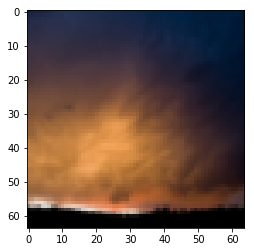

In [26]:
index = 0
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[index]) + ". It's a " + classes[train_y[index]].decode("utf-8") +  " picture.")

y = 1. It's a cat picture.


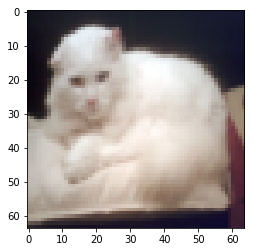

In [27]:
index = 13
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[index]) + ". It's a " + classes[train_y[index]].decode("utf-8") +  " picture.")

### 5.3 使用Scikit

In [28]:
logreg_img = LogisticRegression(C=1,max_iter=500)

In [29]:
logreg_img.fit(train_x,train_y)

/Users/huwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
predict_img = logreg_img.predict(test_x)

In [31]:
accurate = np.sum((predict_img==test_y)) / test_y.shape[0]
print('The test predict is:',accurate)

The test predict is: 0.72


In [32]:
predict_img = logreg_img.predict(train_x)
accurate = np.sum((predict_img==train_y)) / train_y.shape[0]
print('The test predict is:',accurate)

The test predict is: 1.0


#### 5.4 使用LR_Regular

In [33]:
W_img,b_img,cost_img = LR_Regular(train_x,train_y,0.01,1000,0,True,'l2')

Iter:0,loss:nan
Iter:100,loss:nan


/Users/huwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log
/Users/huwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in multiply


Iter:200,loss:nan
Iter:300,loss:nan
Iter:400,loss:inf
Iter:500,loss:2.3370861458646752
Iter:600,loss:1.0534926584987792
Iter:700,loss:0.6529591365207581
Iter:800,loss:0.45723991534598857
Iter:900,loss:0.3497704251041613


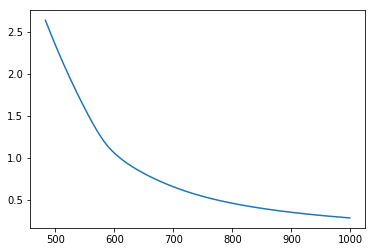

In [34]:
plt.plot(cost_img)

In [35]:
correct_rate = Predict(test_x,test_y,W_img,b_img)
print('The test ste correct rate is:',correct_rate)

The test ste correct rate is: 0.72


In [36]:
correct_rate = Predict(train_x,train_y,W_img,b_img)
print('The train ste correct rate is:',correct_rate)

The train ste correct rate is: 0.9234449760765551


可以看出两个的效果都是类似的,实际上对于图片这种高纬度的数据而言,正确率有0.72已经是相对比较高了.当然正确的做法应该是使用神经网络.

**Ps:**

使用LR_Regular刚开始迭代的时候,存在梯度爆炸的问题,这个实际上是以为数据维度高,而我们欠缺优化超级参数,这点将在神经玩网络中说明.

无论怎样,结果还是不错的.

另外这里出现了上下溢问题:

- 数值上溢:大量级的数被近似为正无穷或负无穷时发生上溢,进一步运算导致无限值变为非数字.
- 数值下溢:接近零的数被四舍五入为0时发生下溢.被零除,取零的对数，进一步运算会变为非数字.

# Homework

使用data_set中的horseColicTest.txt和horseColicTraining.txt做LR

Good Luck~